# Generalized Linear Models and Polynomial Regression with Scikit Learn

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.metrics as skl_metr
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")
data=(data - data.mean()) /data.std()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


In [52]:
#split data to testset and trainset
data_train = data.sample(frac=0.8, random_state=1)
data_test = data.drop(data_train.index)
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)

In [53]:
#seprate trainset to X and Y
data_train_X = data_train.drop(["quality"], axis=1) 
data_train_Y = data_train[["quality"]] #

In [54]:
#seprate testset to X and Y
data_test_X = data_test.drop(["quality"], axis=1)
data_test_Y =data_test[["quality"]] #

In [55]:
#Stack trainset rows in sequence horizontally
data_train_X = data_train_X.as_matrix()
data_train_Y = data_train_Y.as_matrix()

In [56]:
data_test_X = data_test_X.as_matrix()
data_test_Y = data_test_Y.as_matrix()

Part b)

# Ordinary least squares

In [57]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(data_train_X,data_train_Y)
data_predicted_Y = linear_regression.predict(data_test_X)

In [58]:
print('Coefficients: \n', linear_regression.coef_)

Coefficients: 
 [[ 0.03787805 -0.22137057 -0.04092769  0.04666702 -0.10743007  0.04880113
  -0.12895281 -0.03536143 -0.0572019   0.19465744  0.37090432]]


In [59]:
print("Mean squared error: %.2f" % skl_metr.mean_squared_error(data_test_Y, data_predicted_Y))

Mean squared error: 0.67


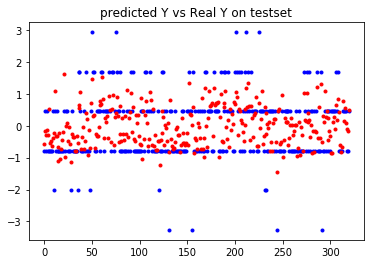

In [60]:
#plot predicted_Y and Y on testset
plt.plot(data_test_Y,'b.', data_predicted_Y,'r.')
plt.title("predicted Y vs Real Y on testset")
plt.show()

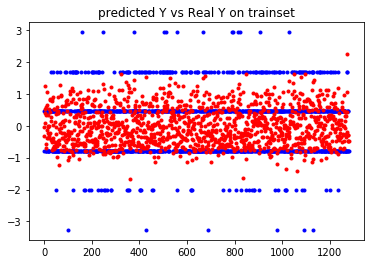

In [61]:
#plot predicted_Y and Y on trainset
plt.plot( data_train_Y, 'b.', linear_regression.predict(data_train_X),'r.')
plt.title("predicted Y vs Real Y on trainset")
plt.show()

In [62]:
#RMSE
print("RMSE on testset: %.2f" % np.square(skl_metr.mean_squared_error(data_test_Y, data_predicted_Y)))
print("RMSE on trainset: %.2f" % np.square(skl_metr.mean_squared_error(data_train_Y, linear_regression.predict(data_train_X))))

RMSE on testset: 0.45
RMSE on trainset: 0.40


# Ridge Regression

In [63]:
alpha = np.linspace(0.0001,1000,50)
numIteration = np.linspace(1,50,50)
RMSE_test= []

In [64]:
RMSE_train = list()
RMSE_test = list()

for a in alpha:
        ridge_regression = Ridge(alpha=a, fit_intercept=True)
        ridge_regression.fit(data_train_X,data_train_Y)
        data_predicted_Y = ridge_regression.predict(data_test_X)
        RMSE_test_temp= sqrt(skl_metr.mean_squared_error(data_test_Y, data_predicted_Y))
        RMSE_train_temp= sqrt(skl_metr.mean_squared_error(data_train_Y, ridge_regression.predict(data_train_X)))
        #print("alpha:    RMSE_train:  RMSE_test:")
        #print('{:1.8f}   {:.3f}    {:.3f}'.format(a,RMSE_train_temp,RMSE_test_temp))
        RMSE_test.append(RMSE_test_temp)
        RMSE_train.append(RMSE_train_temp)

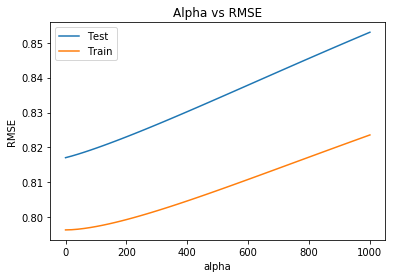

In [65]:
plt.plot(alpha, RMSE_test,label="Test")
plt.plot(alpha, RMSE_train,label="Train")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title("Alpha vs RMSE")
plt.legend()
plt.show()

In [66]:
RMSE_test = list()
RMSE_train= list()

for iteration in numIteration:
        ridge_regression = Ridge(alpha=0.001, fit_intercept=True, solver='lsqr', max_iter=iteration)
        ridge_regression.fit(data_train_X,data_train_Y)
        data_predicted_Y = ridge_regression.predict(data_test_X)
        RMSE_test_temp= sqrt(skl_metr.mean_squared_error(data_test_Y, data_predicted_Y))
        RMSE_train_temp= sqrt(skl_metr.mean_squared_error(data_train_Y, ridge_regression.predict(data_train_X)))
        #print("alpha:    RMSE_train:  RMSE_test:")
        #print('{:1.8f}   {:.3f}    {:.3f}'.format(a,RMSE_train_temp,RMSE_test_temp))
        RMSE_test.append(RMSE_test_temp)
        RMSE_train.append(RMSE_train_temp)

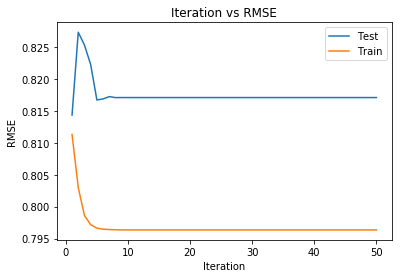

In [67]:
plt.plot(numIteration, RMSE_test,label="Test")
plt.plot(numIteration, RMSE_train,label="Train")
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title("Iteration vs RMSE")
plt.legend()
plt.show()

In [68]:
#Pick up three hyperparameters

In [69]:
alpha = [0.0001, 100 , 1000]

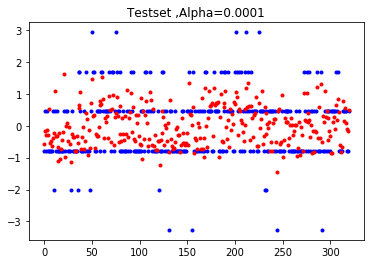

RMSE_test:
0.817


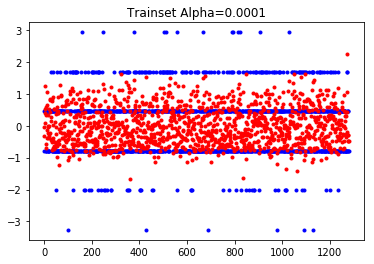

RMSE_train:
0.796


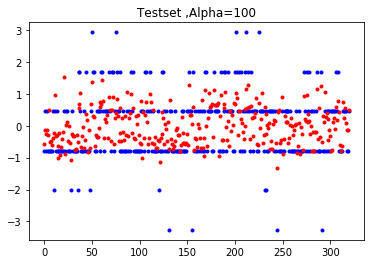

RMSE_test:
0.820


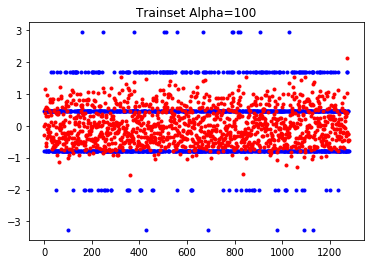

RMSE_train:
0.797


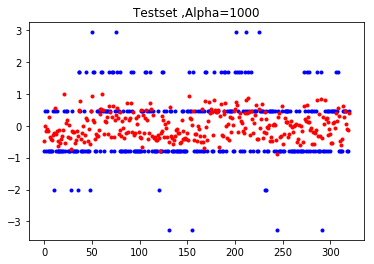

RMSE_test:
0.853


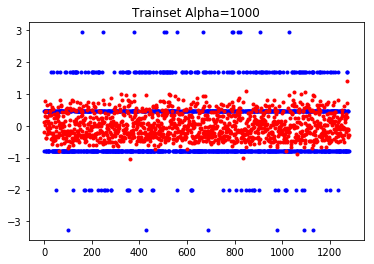

RMSE_train:
0.824


In [70]:
RMSE_test = list() #list of result for changing alpha
RMSE_train = list() #list of result for changing alpha
for a in alpha:
        ridge_regression = linear_model.Ridge(alpha=a, fit_intercept=True)
        ridge_regression.fit(data_train_X,data_train_Y)
        data_predicted_Y = ridge_regression.predict(data_test_X)
        RMSE_test_temp= sqrt(skl_metr.mean_squared_error(data_test_Y, data_predicted_Y))
        RMSE_train_temp= sqrt(skl_metr.mean_squared_error(data_train_Y, ridge_regression.predict(data_train_X)))


        plt.plot(data_test_Y,'b.',data_predicted_Y,'r.')
        plt.title("Testset ,Alpha="+str(a))
        plt.legend()
        plt.show()
        
        print("RMSE_test:")
        print('{:.3f}'.format(RMSE_test_temp)) 
        
        plt.plot(data_train_Y,'b.', ridge_regression.predict(data_train_X),'r.')
        plt.title("Trainset Alpha="+str(a))
        plt.legend()
        plt.show()
        
        print("RMSE_train:")
        print('{:.3f}'.format(RMSE_train_temp))    
        
        RMSE_test_temp= sqrt(skl_metr.mean_squared_error(data_test_Y, data_predicted_Y))
        RMSE_train_temp= sqrt(skl_metr.mean_squared_error(data_train_Y, ridge_regression.predict(data_train_X)))
        RMSE_test.append(RMSE_test_temp)
        RMSE_train.append(RMSE_train_temp)

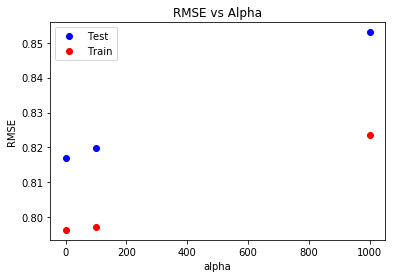

In [71]:
plt.plot(alpha, RMSE_test,'bo', linewidth= 2, label= "Test")
plt.plot(alpha, RMSE_train,'ro',linewidth= 2,label= "Train")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title("RMSE vs Alpha")
plt.legend()
plt.show()

# LASSO

In [72]:
alpha = np.linspace(0.0001,0.1,50)
numIteration = np.linspace(1,50,50)

In [73]:
RMSE_train = list()
RMSE_test = list()
for a in alpha:
        ridge_regression = Lasso(alpha=a, fit_intercept=True)
        ridge_regression.fit(data_train_X,data_train_Y)
        data_predicted_Y = ridge_regression.predict(data_test_X)
        RMSE_test_temp= sqrt(skl_metr.mean_squared_error(data_test_Y, data_predicted_Y))
        RMSE_train_temp= sqrt(skl_metr.mean_squared_error(data_train_Y, ridge_regression.predict(data_train_X)))
        RMSE_test.append(RMSE_test_temp)
        RMSE_train.append(RMSE_train_temp)

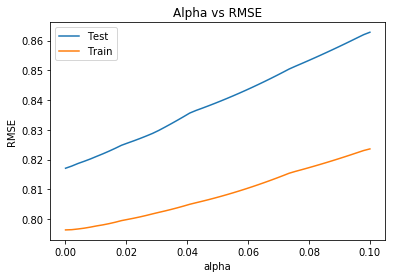

In [74]:
plt.plot(alpha, RMSE_test,label="Test")
plt.plot(alpha, RMSE_train,label="Train")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title("Alpha vs RMSE")
plt.legend()
plt.show()

In [75]:
alpha = [0.001, 100 , 1000]
RMSE_test = list() #list of result for changing alpha
RMSE_train = list() #list of result for changing alpha

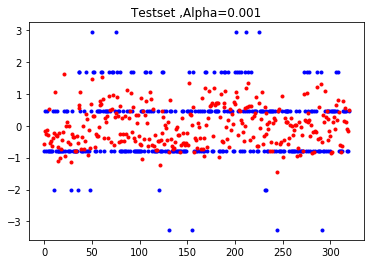

RMSE_test:
0.863


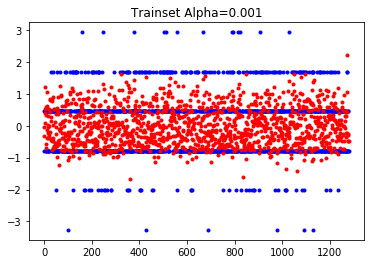

RMSE_train:
0.824


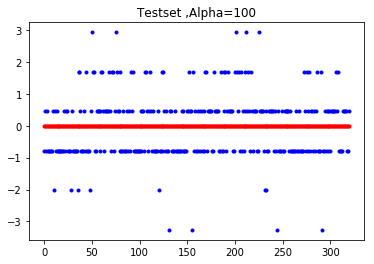

RMSE_test:
0.817


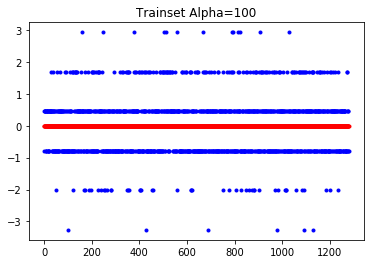

RMSE_train:
0.796


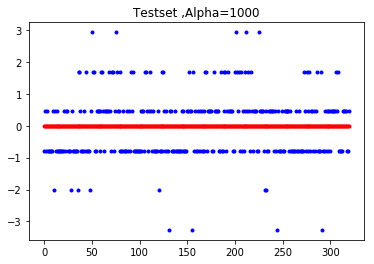

RMSE_test:
1.042


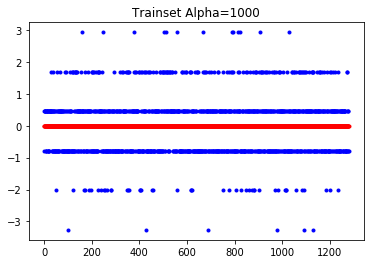

RMSE_train:
0.989


In [76]:
RMSE_test = list()
RMSE_train= list()
for a in alpha:
        ridge_regression = Lasso(alpha=a, fit_intercept=True)
        ridge_regression.fit(data_train_X,data_train_Y)
        data_predicted_Y = ridge_regression.predict(data_test_X)

        plt.plot(data_test_Y,'b.',data_predicted_Y,'r.')
        plt.title("Testset ,Alpha="+str(a))
        plt.legend()
        plt.show()
        
        print("RMSE_test:")
        print('{:.3f}'.format(RMSE_test_temp)) 
        
        plt.plot(data_train_Y,'b.', ridge_regression.predict(data_train_X),'r.')
        plt.title("Trainset Alpha="+str(a))
        plt.legend()
        plt.show()
        
        print("RMSE_train:")
        print('{:.3f}'.format(RMSE_train_temp)) 
        
        RMSE_test_temp= sqrt(skl_metr.mean_squared_error(data_test_Y, data_predicted_Y))
        RMSE_train_temp= sqrt(skl_metr.mean_squared_error(data_train_Y, ridge_regression.predict(data_train_X)))
        RMSE_test.append(RMSE_test_temp)
        RMSE_train.append(RMSE_train_temp)

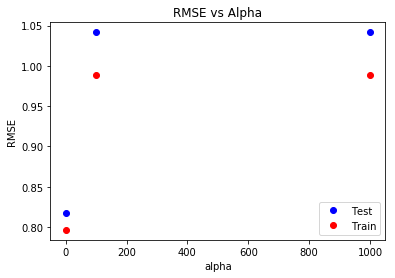

In [77]:
plt.plot(alpha, RMSE_test,'bo',label= "Test")
plt.plot(alpha, RMSE_train,'ro',label= "Train")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title("RMSE vs Alpha")
plt.legend()
plt.show()

Part C)

In [95]:
from sklearn.grid_search import GridSearchCV

class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs    
    
    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series(dict(params.items() | d.items()))
                      
        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                for k in self.keys
                for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [96]:
models = { 
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

parameters = { 
    'LinearRegression': { },
    'Ridge': { 'alpha': [0.0001, 100,1000] },
    'Lasso': { 'alpha': [0.0001, 100,1000] }
}

estimator = EstimatorSelectionHelper(models, parameters)
estimator.fit(data_train_X, data_train_Y, n_jobs=1)
estimator.score_summary()

Running GridSearchCV for LinearRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running GridSearchCV for Ridge.
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Running GridSearchCV for Lasso.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


,estimator,min_score,mean_score,max_score,std_score,alpha
0,LinearRegression,-0.528285,0.202232,0.61528,0.518025,NaN
1,Ridge,-0.525977,0.20547,0.612408,0.518304,0.0001
2,Ridge,-11.1419,-6.65181,-0.205344,4.67423,100
3,Ridge,-11.1547,-6.66344,-0.214228,4.67609,1000
4,Lasso,-0.515079,0.217297,0.59572,0.517965,0.0001
5,Lasso,-11.1562,-6.66474,-0.215219,4.6763,100
6,Lasso,-11.1562,-6.66474,-0.215219,4.6763,1000


# Polynomial Regression

Part a)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

In [88]:
Mu= 1
Sigma= 0.05

In [89]:
X = np.random.normal(Mu, Sigma, 100)
Err = np.random.rand(100)

In [90]:
Y = np.zeros(100)
X= X.reshape(-1,1)

In [91]:
for i in range(len(X)):
    Y[i] = (1.3*(X[i] **2) )+ (4.8 * X[i]) + 8 + Err[i]

In [92]:
data_train_X, data_test_X, data_train_Y, data_test_Y = train_test_split(X, Y, test_size=0.2)

data_test_X.sort(axis=0)
data_test_Y.sort(axis=0)
data_train_X.sort(axis=0)
data_train_Y.sort(axis=0)

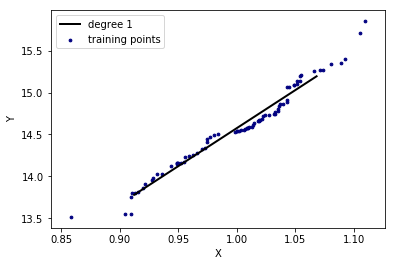

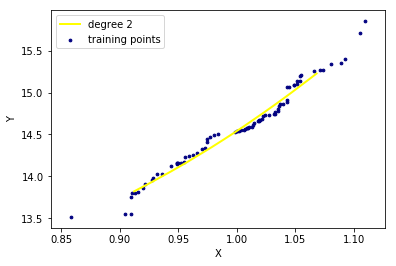

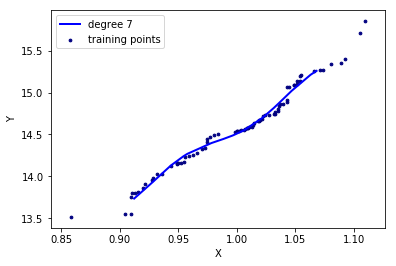

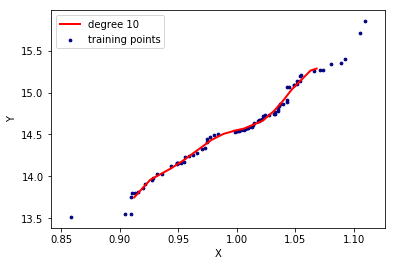

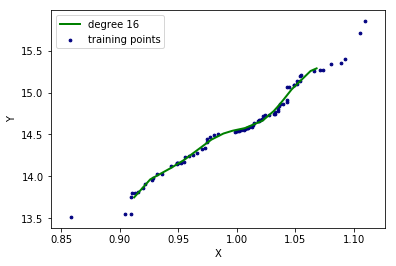

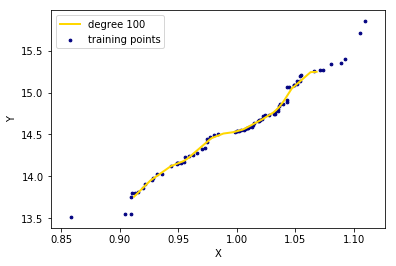

In [93]:
colors = ['black', 'yellow', 'blue', 'red','green', 'gold']
degree = [1, 2,7, 10,16,100]
for i in range(len(degree)):
    plt.scatter(data_train_X, data_train_Y, color='navy', s=30, marker='.', label="training points")
    model = make_pipeline(PolynomialFeatures(degree[i]), LinearRegression())
    model.fit(data_train_X , data_train_Y)
    data_predicted_Y = model.predict(data_test_X)
    plt.plot(data_test_X, data_predicted_Y, color=colors[i], linewidth=2, label="degree %d" % degree[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

Part b)

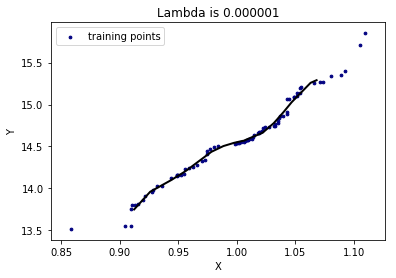

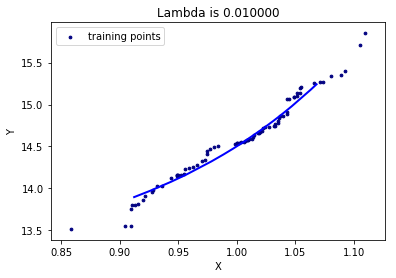

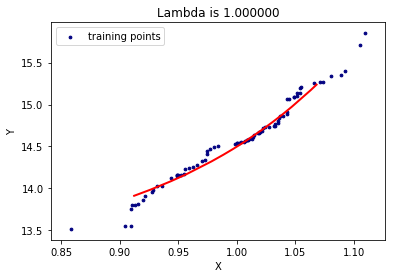

In [97]:
colors = ['black','blue', 'red']
Lambda = [0.000001, 0.01 , 1]
for i in range(len(Lambda)):
    plt.scatter(data_train_X, data_train_Y, color='navy', s=30, marker='.', label="training points")
    model = make_pipeline(PolynomialFeatures(10),  Ridge(alpha=i, fit_intercept=True))
    model.fit(data_train_X , data_train_Y)
    data_predicted_Y = model.predict(data_test_X)
    plt.plot(data_test_X, data_predicted_Y, color=colors[i], linewidth=2)
    plt.title("Lambda is %f" % Lambda[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()